<a href="https://colab.research.google.com/github/regmiaayush7/EDA-Sentiment-Analysis-on-Udemy-review-data-/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_stock = pd.read_csv('/content/drive/MyDrive/Stockmarket-SET/TATASTEEL.csv', parse_dates=[0])
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4792 non-null   float64     

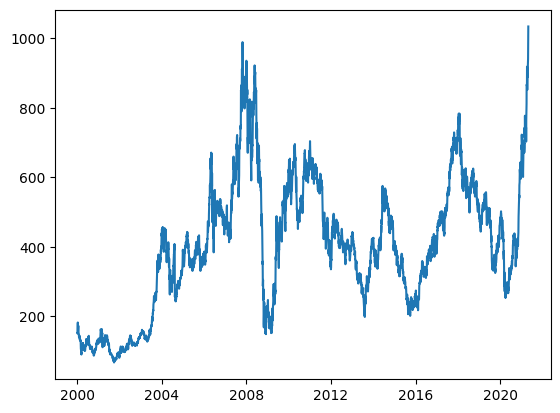

In [3]:
# plt.figure(figsize=(10, 4))
plt.plot(df_stock['Date'], df_stock['Close'])

In [4]:
#Dataframe with Date and Close price only
df_stock2 = df_stock[['Date', 'Close']]

In [5]:
df_stock2.tail()

,Date,Close
5301,2021-04-26,940.75
5302,2021-04-27,977.75
5303,2021-04-28,971.40
5304,2021-04-29,1031.35
5305,2021-04-30,1034.00


In [6]:
df_stock2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5306 non-null   datetime64[ns]
 1   Close   5306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 83.0 KB


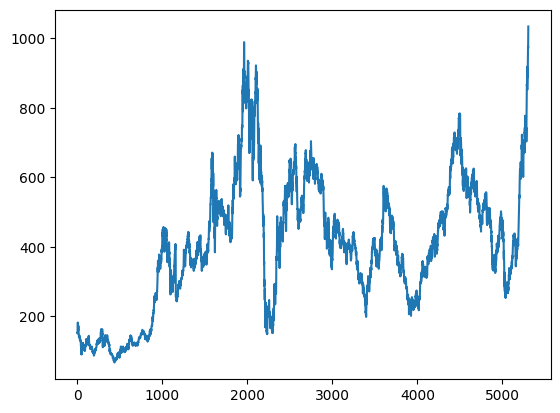

In [7]:
plt.plot(df_stock2['Close'])

<Axes: ylabel='Close'>

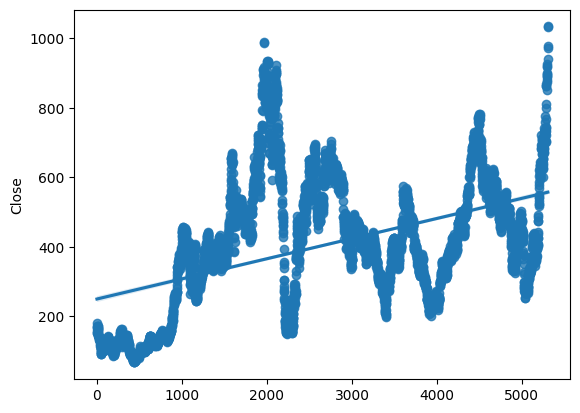

In [8]:
# There is a positive trend
sns.regplot(x = df_stock2.index.values, y = df_stock['Close'])

In [9]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

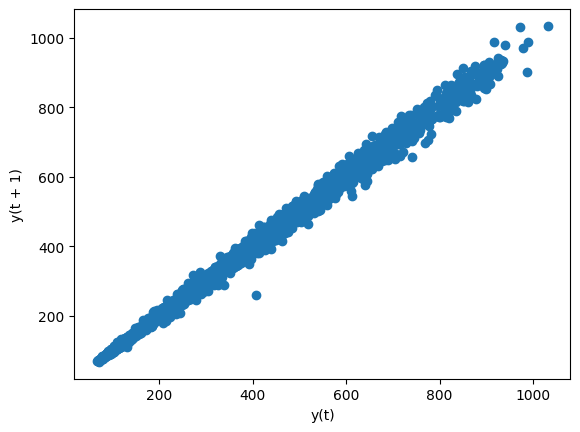

In [10]:
#lag plot
lag_plot(df_stock2['Close'])

In [11]:
# ## Autocorrelation plot
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

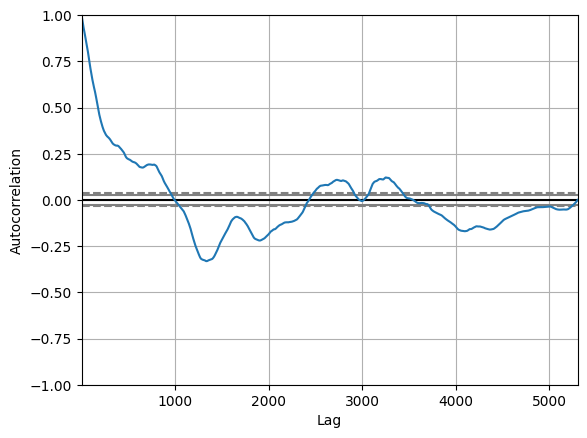

In [12]:
autocorrelation_plot(df_stock2['Close'])

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_stock['Close'])
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -1.5164132967791808
p-value:  0.5253768561523071


In [14]:
df_stock3 = df_stock2
df_stock3.index = df_stock3['Date']
df_stock3.head(5)

,Date,Close
Date,,
2000-01-03,2000-01-03,152.45
2000-01-04,2000-01-04,150.80
2000-01-05,2000-01-05,156.55
2000-01-06,2000-01-06,168.25
2000-01-07,2000-01-07,171.95


In [15]:
result = adfuller(df_stock3['Close'])
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -1.5164132967791808
p-value:  0.5253768561523071


In [16]:
# y(t) = Level + Trend + Seasonality + Noise

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
result = seasonal_decompose(df_stock3['Close'], model='multiplicative', period=1)

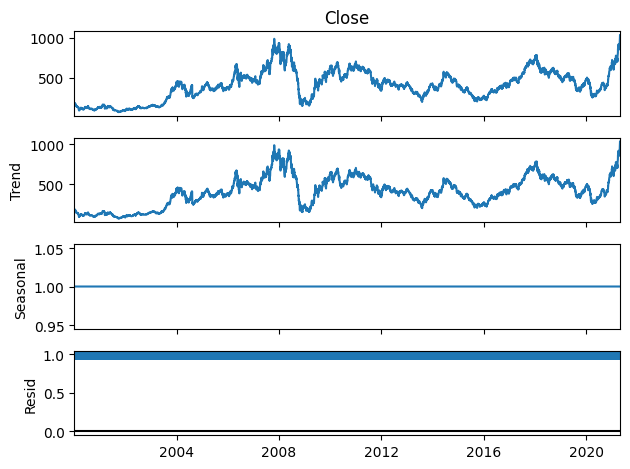

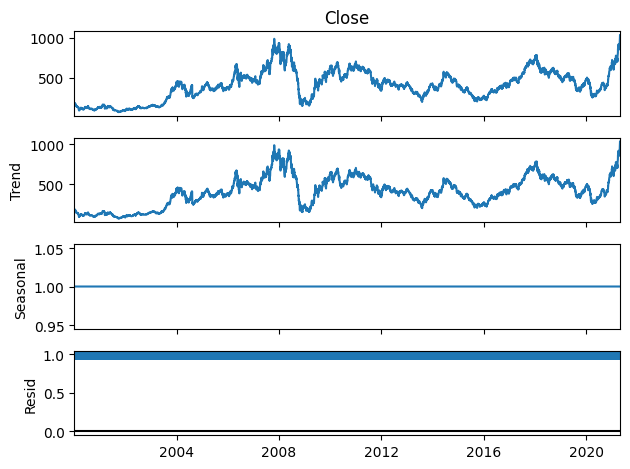

In [19]:
result.plot()

In [20]:
# Removing trend and seasonality using differencing
df_stock3.head()

,Date,Close
Date,,
2000-01-03,2000-01-03,152.45
2000-01-04,2000-01-04,150.80
2000-01-05,2000-01-05,156.55
2000-01-06,2000-01-06,168.25
2000-01-07,2000-01-07,171.95


# Applying Differenciation to convert non-stationary data in stationary data

In [21]:
df_stock3['lag_1'] = df_stock3['Close'].shift(1)
df_stock3['diff_1'] = df_stock3['Close'].diff(periods = 1)
df_stock3.head()

<ipython-input-21-e2b25fe3cee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock3['lag_1'] = df_stock3['Close'].shift(1)
<ipython-input-21-e2b25fe3cee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock3['diff_1'] = df_stock3['Close'].diff(periods = 1)


,Date,Close,lag_1,diff_1
Date,,,,
2000-01-03,2000-01-03,152.45,NaN,NaN
2000-01-04,2000-01-04,150.80,152.45,-1.65
2000-01-05,2000-01-05,156.55,150.80,5.75
2000-01-06,2000-01-06,168.25,156.55,11.70
2000-01-07,2000-01-07,171.95,168.25,3.70


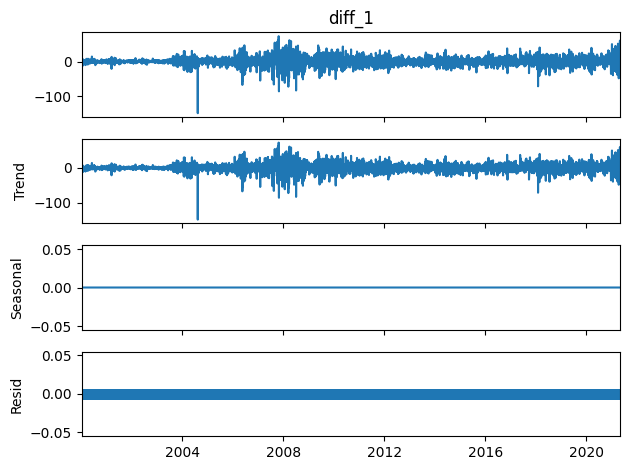

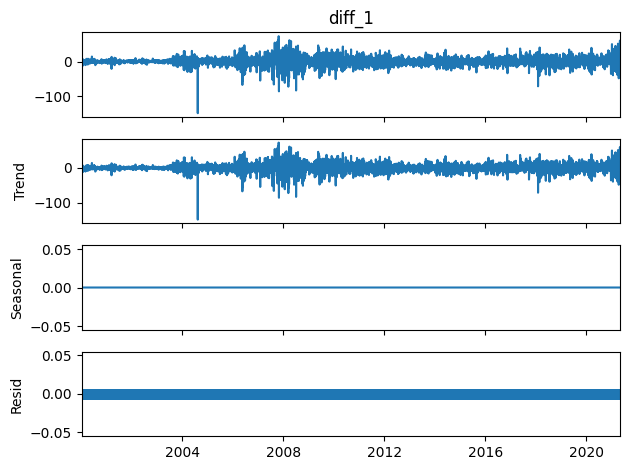

In [22]:
result3 = seasonal_decompose(df_stock3.iloc[1:,3], model = 'additive', period =1)
result3.plot()

In [23]:
result = adfuller(df_stock3['diff_1'].dropna())
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -23.822948777321024
p-value:  0.0


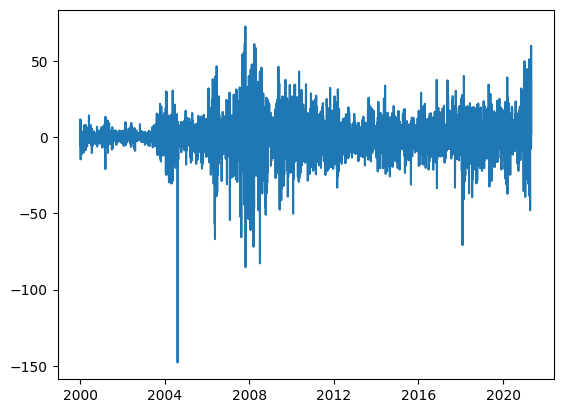

In [24]:
plt.plot(df_stock3['diff_1'])

In [25]:
result = adfuller(df_stock3['diff_1'].dropna())
print('ADF Test Statistic: ', result[0])
print('p-value: ', result[1])

ADF Test Statistic:  -23.822948777321024
p-value:  0.0


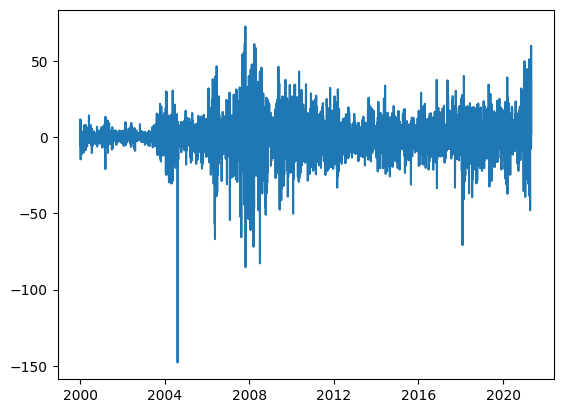

In [26]:
plt.plot(df_stock3['diff_1'])

In [27]:
# ## Create train and test datasets
train_size = int(df_stock3.shape[0]*0.8)
train_size

4244

In [28]:
train = df_stock3[1:train_size-7]
test = df_stock3[train_size-7:]

In [29]:
train.head()

,Date,Close,lag_1,diff_1
Date,,,,
2000-01-04,2000-01-04,150.80,152.45,-1.65
2000-01-05,2000-01-05,156.55,150.80,5.75
2000-01-06,2000-01-06,168.25,156.55,11.70
2000-01-07,2000-01-07,171.95,168.25,3.70
2000-01-10,2000-01-10,182.25,171.95,10.30


In [30]:
train_x, train_y = train['lag_1'], train['Close']
test_x, test_y = test['lag_1'], test['Close']

In [31]:
# Walk forward validation
predictions = test_x.copy()
predictions

Date
2017-01-04     403.30
2017-01-05     405.45
2017-01-06     419.30
2017-01-09     419.55
2017-01-10     422.00
               ...   
2021-04-26     925.60
2021-04-27     940.75
2021-04-28     977.75
2021-04-29     971.40
2021-04-30    1031.35
Name: lag_1, Length: 1069, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
# mean squared error
mse = mean_squared_error(test_y, predictions)
mse

151.79322731524792

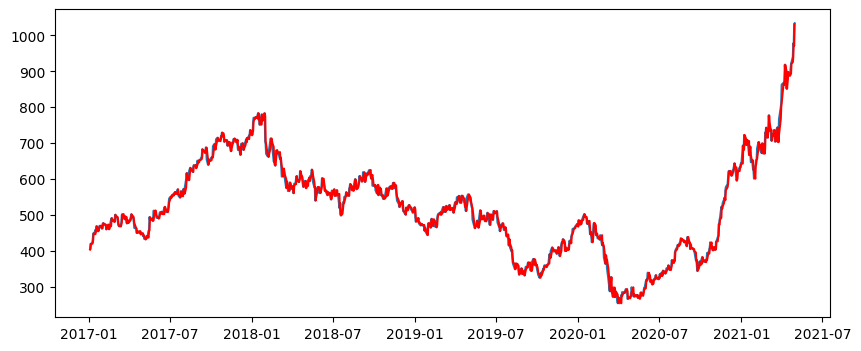

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(test_y)
plt.plot(predictions, color='red')

# ARIMA(p,d,q)

In [35]:
# ## ARIMA

In [36]:
# D = 1 value will be 1 as diff_1 is used (there is not quadratic trend)
# p = 6 As the partial autocorrelation plot shows that the 6 lag value is crossing interval
# q = 0 as tha autocorrelation plot shows that all the lag value is crossing the interval
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

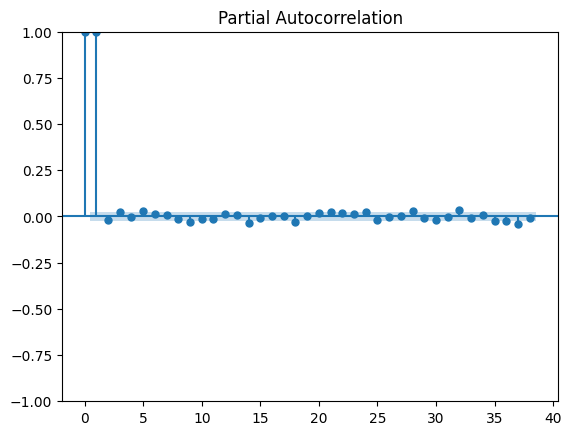

In [37]:
plot_pacf(df_stock3['Close']);

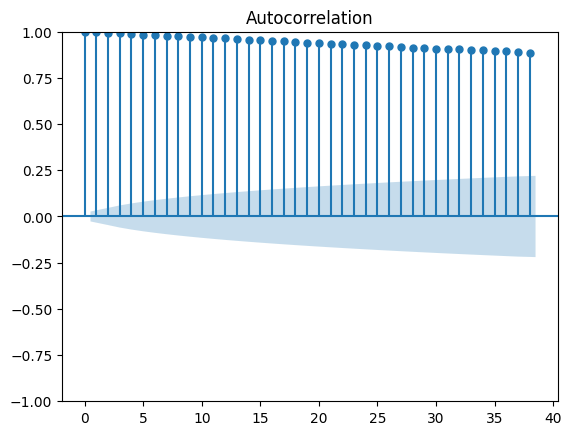

In [38]:
plot_acf(df_stock3['Close']);

## Building ARIMA model

In [39]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_stock3['Close'], order = (2, 1, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
model_fit = model.fit()

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5306
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -20606.833
Date:                Wed, 11 Oct 2023   AIC                          41219.666
Time:                        09:54:21   BIC                          41239.395
Sample:                             0   HQIC                         41226.560
                               - 5306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0287      0.009      3.214      0.001       0.011       0.046
ar.L2          0.0094      0.008      1.170      0.242      -0.006       0.025
sigma2       138.5545      1.121    123.610      0.000     136.358     140.751
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20522.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

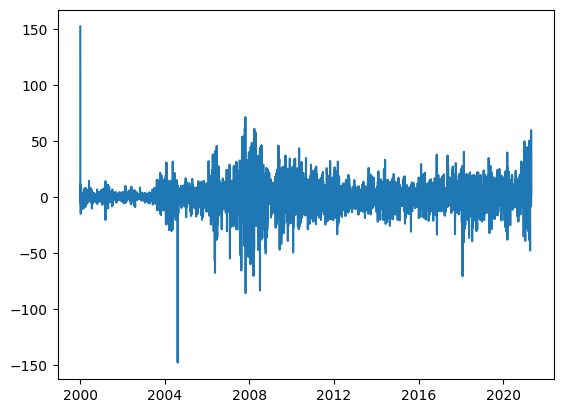

In [42]:
residuals_arima = model_fit.resid
plt.plot(residuals_arima)

In [43]:
residuals_arima.describe()

count    5306.000000
mean        0.188678
std        11.952295
min      -147.881343
25%        -4.922709
50%         0.145146
75%         5.420950
max       152.450000
dtype: float64

In [44]:
train = df_stock3[1:train_size-7]
test = df_stock3[train_size-7:]
train.head()

,Date,Close,lag_1,diff_1
Date,,,,
2000-01-04,2000-01-04,150.80,152.45,-1.65
2000-01-05,2000-01-05,156.55,150.80,5.75
2000-01-06,2000-01-06,168.25,156.55,11.70
2000-01-07,2000-01-07,171.95,168.25,3.70
2000-01-10,2000-01-10,182.25,171.95,10.30


In [45]:
start = len(train)
end = len(train)+len(test)-1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
pred

Date
2017-01-03    407.184312
2017-01-04    403.346130
2017-01-05    405.479377
2017-01-06    419.717405
2017-01-09    419.686817
                 ...    
2021-04-23    922.241650
2021-04-26    925.976959
2021-04-27    941.223885
2021-04-28    978.953140
2021-04-29    971.564201
Name: predicted_mean, Length: 1069, dtype: float64

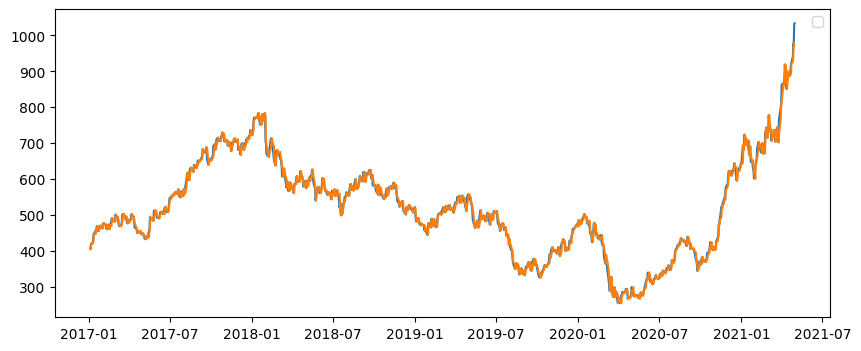

In [46]:
plt.figure(figsize=(10, 4))
plt.plot(test['Close'])
plt.plot(pred)
plt.legend()

In [4]:
from sklearn.metrics import mean_squared_error

In [48]:
mes = mean_squared_error(pred, test['Close'])
mes

304.42491192507606

In [49]:
test['Close'].mean(), np.sqrt(test['Close'].var())

(521.16604303087, 133.6514945893122)

## END OF ARIMA

### START OF LSTM

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df= pd.read_csv('/content/drive/MyDrive/Stockmarket-SET/TATASTEEL.csv', index_col = 'Date', parse_dates = [0])
df.freq = 'D'
len(df)

5306

In [52]:
df_stock = df[['Close']]
df_stock

,Close
Date,
2000-01-03,152.45
2000-01-04,150.80
2000-01-05,156.55
2000-01-06,168.25
2000-01-07,171.95
...,...
2021-04-26,940.75
2021-04-27,977.75
2021-04-28,971.40


In [53]:
train_size = int(df_stock.shape[0]*0.8)
train = df_stock.iloc[:4244]
test = df_stock.iloc[1062:]
train.head()

,Close
Date,
2000-01-03,152.45
2000-01-04,150.80
2000-01-05,156.55
2000-01-06,168.25
2000-01-07,171.95


In [54]:
df_stock.head(),df_stock.tail()

(             Close
 Date              
 2000-01-03  152.45
 2000-01-04  150.80
 2000-01-05  156.55
 2000-01-06  168.25
 2000-01-07  171.95,
               Close
 Date               
 2021-04-26   940.75
 2021-04-27   977.75
 2021-04-28   971.40
 2021-04-29  1031.35
 2021-04-30  1034.00)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[0:5], scaled_test[0:5]

(array([[0.0924429 ],
        [0.09065263],
        [0.09689144],
        [0.10958607],
        [0.11360061]]),
 array([[0.33901156],
        [0.34156133],
        [0.34329735],
        [0.35327944],
        [0.36461781]]))

In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [57]:
# Define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [59]:
# Define model
model = Sequential()
model.add(LSTM(108, activation='relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss = 'mse')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 108)               47520     
                                                                 
 dense (Dense)               (None, 1)                 109       
                                                                 
Total params: 47629 (186.05 KB)
Trainable params: 47629 (186.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Fit model
model.fit(generator, epochs = 50)

Epoch 1/50
4232/4232 [==============================] - 112s 25ms/step - loss: 0.0014
Epoch 2/50
4232/4232 [==============================] - 99s 23ms/step - loss: 3.9720e-04
Epoch 3/50
4232/4232 [==============================] - 99s 23ms/step - loss: 3.1710e-04
Epoch 4/50
4232/4232 [==============================] - 103s 24ms/step - loss: 2.5154e-04
Epoch 5/50
4232/4232 [==============================] - 101s 24ms/step - loss: 2.5443e-04
Epoch 6/50
4232/4232 [==============================] - 98s 23ms/step - loss: 2.3713e-04
Epoch 7/50
4232/4232 [==============================] - 103s 24ms/step - loss: 2.3006e-04
Epoch 8/50
4232/4232 [==============================] - 103s 24ms/step - loss: 2.2729e-04
Epoch 9/50
4232/4232 [==============================] - 100s 24ms/step - loss: 2.2250e-04
Epoch 10/50
4232/4232 [==============================] - 98s 23ms/step - loss: 2.2141e-04
Epoch 11/50
4232/4232 [==============================] - 100s 24ms/step - loss: 2.2086e-04
Epoch 12/50
4232

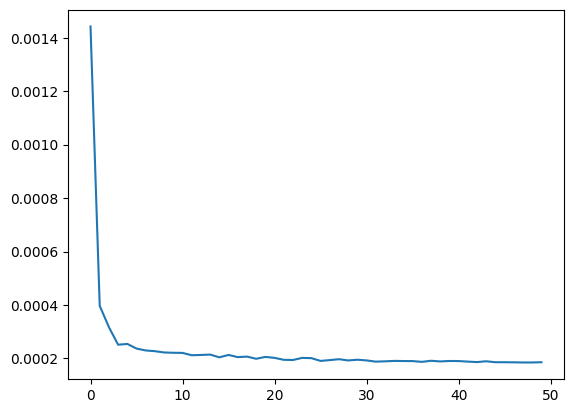

In [62]:
# Shows loss is reducing in each epoch
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [63]:
# Taking last 12 values in the training set to make predictions for the first value in the test set
last_train_batch = scaled_train[-12:]

In [64]:
# Format as (1, 12, 1)
last_train_batch = last_train_batch.reshape(1, n_input, n_features)

In [65]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 166ms/step


array([[0.41375333]], dtype=float32)

In [66]:
scaled_test[0]

array([0.33901156])

In [67]:
# make predictions on the testing set
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1, n_input, n_features)

for i in range(len(test)):
  # Get prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  # Append prediction into the array
  test_predictions.append(current_pred)

  # Use the prediction to update the batch and remove first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 27ms/step


In [68]:
test_predictions

[array([0.41375333], dtype=float32),
 array([0.413897], dtype=float32),
 array([0.41408378], dtype=float32),
 array([0.4141559], dtype=float32),
 array([0.41408014], dtype=float32),
 array([0.4138371], dtype=float32),
 array([0.41345462], dtype=float32),
 array([0.41297135], dtype=float32),
 array([0.41240028], dtype=float32),
 array([0.41175908], dtype=float32),
 array([0.41108286], dtype=float32),
 array([0.4103991], dtype=float32),
 array([0.409709], dtype=float32),
 array([0.40901738], dtype=float32),
 array([0.40832645], dtype=float32),
 array([0.40763873], dtype=float32),
 array([0.40695634], dtype=float32),
 array([0.40628105], dtype=float32),
 array([0.40561396], dtype=float32),
 array([0.404956], dtype=float32),
 array([0.4043076], dtype=float32),
 array([0.40366912], dtype=float32),
 array([0.40304062], dtype=float32),
 array([0.4024222], dtype=float32),
 array([0.40181386], dtype=float32),
 array([0.40121555], dtype=float32),
 array([0.40062717], dtype=float32),
 array([0.40

In [69]:
true_predictions = scaler.inverse_transform(test_predictions)

In [70]:
test['predictions'] = true_predictions
test

<ipython-input-70-7013f04b897b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


,Close,predictions
Date,,
2004-03-29,379.70,448.585757
2004-03-30,382.05,448.718177
2004-03-31,383.65,448.890315
2004-04-01,392.85,448.956786
2004-04-02,403.30,448.886964
...,...,...
2021-04-26,940.75,404.150406
2021-04-27,977.75,404.150406
2021-04-28,971.40,404.150406


<Axes: xlabel='Date'>

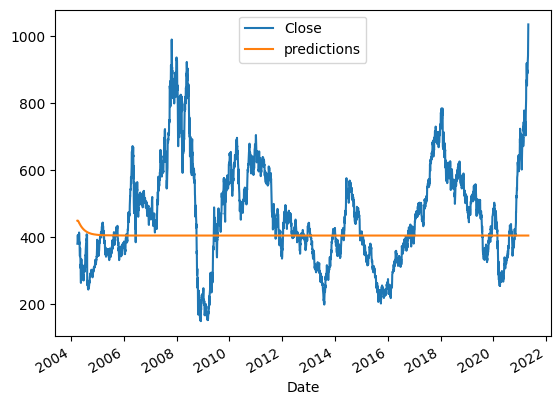

In [71]:
test.plot()

In [72]:
test.var()

Close          22936.805180
predictions       16.977853
dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Close'], test['predictions'])

# MSE for LSTM

In [74]:
mse

26735.042314883147

In [8]:
from sklearn.metrics import r2_score

In [77]:
r_squared = r2_score(test['predictions'], test['Close'])
print("R-squared:", r_squared)

R-squared: -1574.0721627196394


In [78]:
test['predictions'].var()

16.977852776586317

# Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [83]:
dfr= pd.read_csv('/content/drive/MyDrive/Stockmarket-SET/TATASTEEL.csv', parse_dates=['Date'], index_col='Date')

In [84]:
dfr

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,TISCO,EQ,142.35,148.00,153.20,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
2000-01-04,TISCO,EQ,152.45,150.10,153.00,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2000-01-05,TISCO,EQ,150.80,144.60,162.90,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
2000-01-06,TISCO,EQ,156.55,158.95,169.10,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
2000-01-07,TISCO,EQ,168.25,173.40,179.00,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,TATASTEEL,EQ,925.60,935.00,956.00,930.05,942.50,940.75,942.98,21234858,2.002407e+15,274958.0,4584617.0,0.2159
2021-04-27,TATASTEEL,EQ,940.75,948.30,983.00,944.30,982.00,977.75,965.43,24904515,2.404346e+15,331493.0,3575969.0,0.1436
2021-04-28,TATASTEEL,EQ,977.75,985.00,986.00,962.00,971.00,971.40,972.08,20447968,1.987700e+15,255599.0,3550908.0,0.1737


In [85]:
stock_data = dfr[['Close']]

In [87]:
# Step 3: Create the lagged dataset
lags = 3 # number of lags to consider
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    stock_data[col] = stock_data['Close'].shift(lag)
    cols.append(col)
stock_data.dropna(inplace=True)

<ipython-input-87-c99d2f0935e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[col] = stock_data['Close'].shift(lag)
<ipython-input-87-c99d2f0935e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[col] = stock_data['Close'].shift(lag)
<ipython-input-87-c99d2f0935e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [88]:
# Step 4: Split the data into train and test sets
X = stock_data[cols]
y = stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [89]:
# Step 5: Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [90]:
# Step 6: Make predictions on the test set
y_pred = rf.predict(X_test)

In [91]:
# Step 7: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 220.20538585650303


In [92]:
y_pred.var()

17555.85319286242

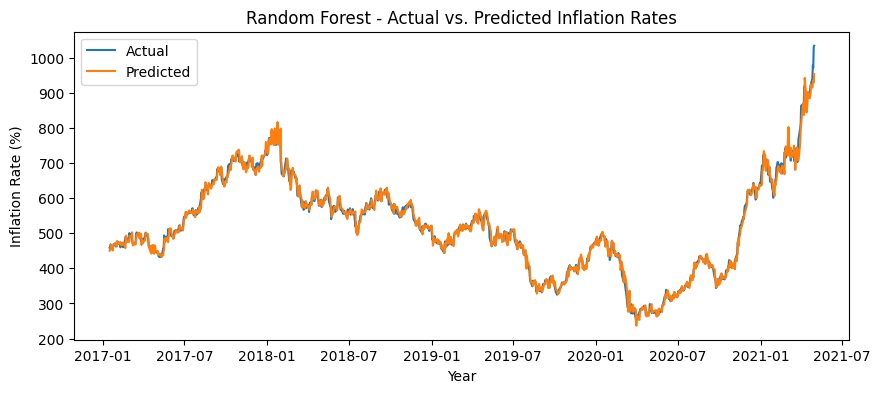

In [93]:
# Step 8: Plot the actual and predicted values
plt.figure(figsize=(10, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Random Forest - Actual vs. Predicted Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

# Support Vector Regressor

In [18]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [10]:
dfd= pd.read_csv('/content/drive/MyDrive/Stockmarket-SET/TATASTEEL.csv')

In [11]:
dfd['Date'] = pd.to_datetime(dfd['Date'])
dfd = dfd.set_index('Date')

In [12]:
data_stock = dfd[['Close']]

In [14]:
data_stock.tail()

,Close
Date,
2021-04-26,940.75
2021-04-27,977.75
2021-04-28,971.40
2021-04-29,1031.35
2021-04-30,1034.00


In [16]:
train_size = int(len(data_stock) * 0.8)
train_data = data_stock[:train_size]
test_data =  data_stock[train_size:]

In [19]:
# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [20]:
#  Create the feature set and target set
def create_sets(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps-1):
    X.append(data[i:(i+n_steps), 0])
    y.append(data[i+n_steps, 0])
  return np.array(X), np.array(y)

n_steps = 3
X_train, y_train = create_sets(train_data, n_steps)
X_test, y_test = create_sets(test_data, n_steps)

In [21]:
# Train the SVR model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [22]:
# Predict the inflation values
y_pred = model.predict(X_test)

In [23]:
#  transform the predicted and actual values back to their original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [24]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 907.9242934004046


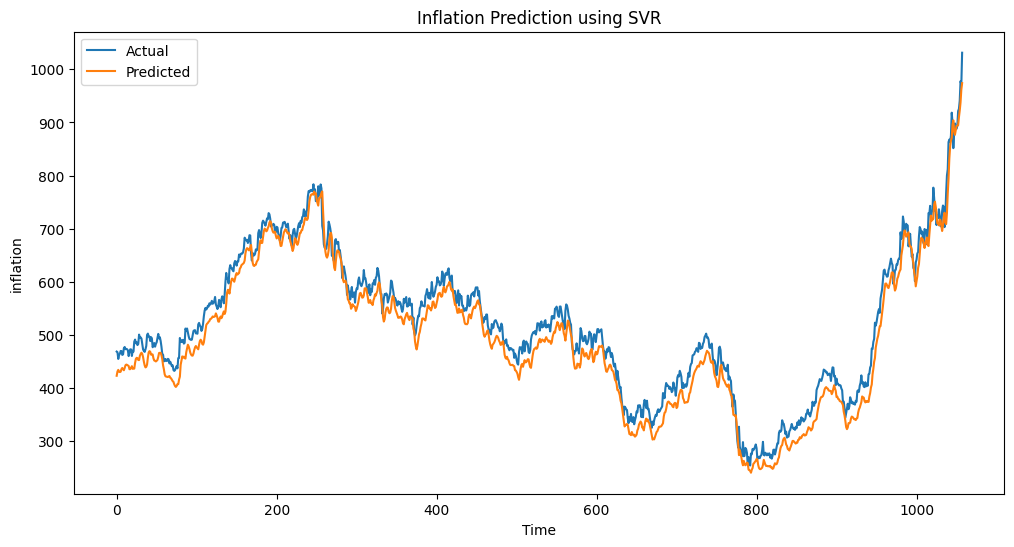

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Inflation Prediction using SVR')
plt.xlabel('Time')
plt.ylabel('inflation')
plt.legend()
plt.show()